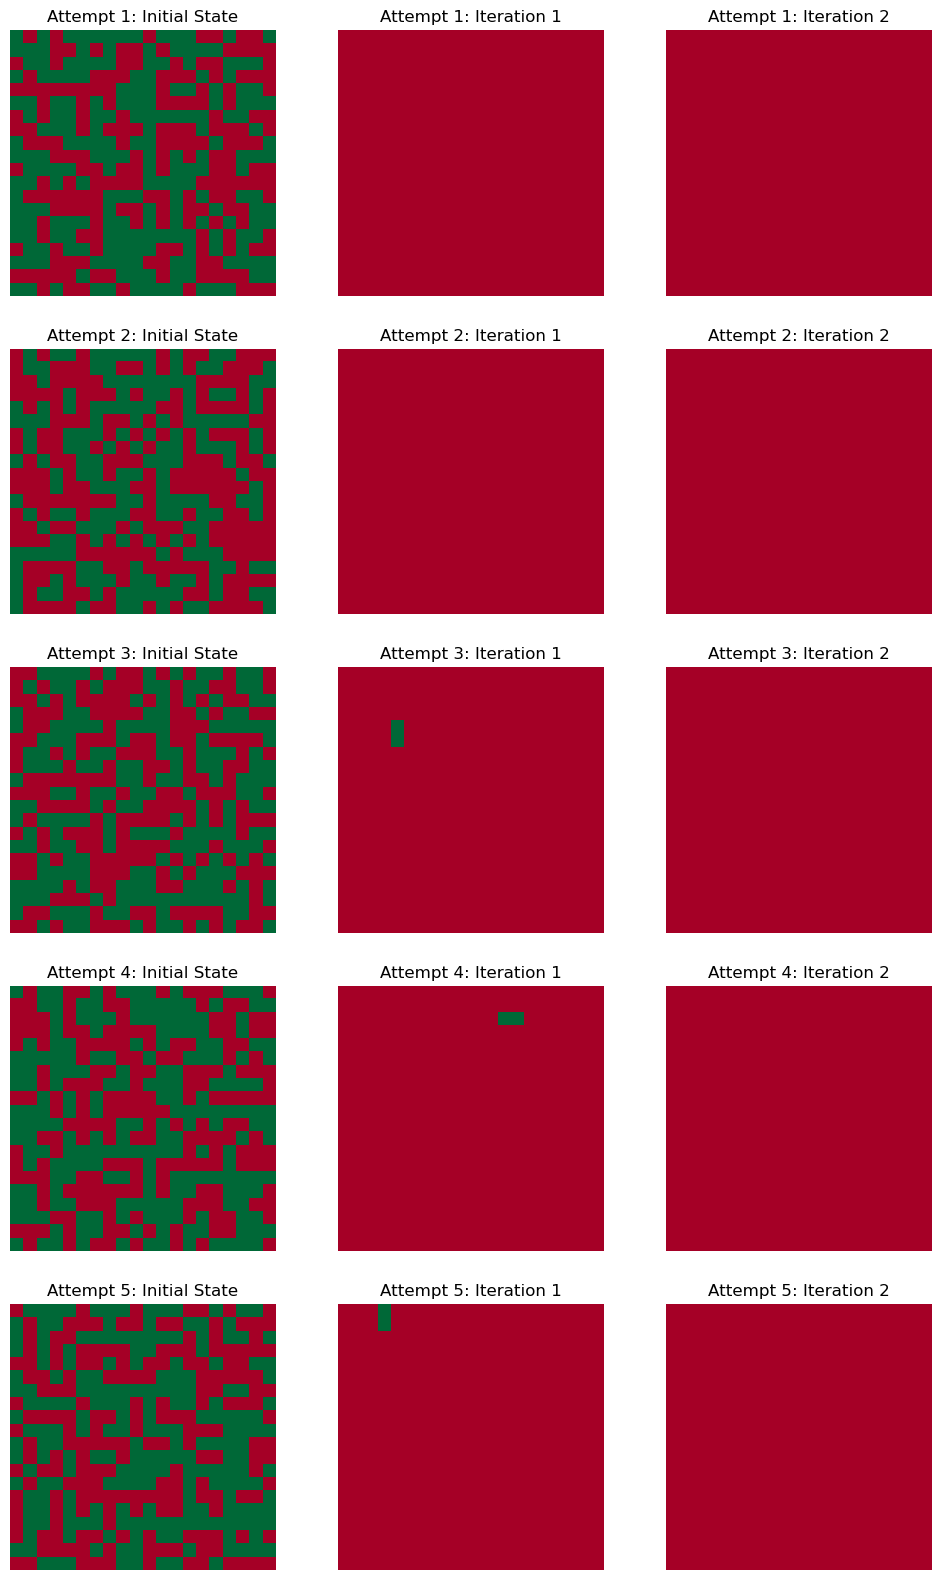

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random

# TORUS

#Traditional Prisoner's Dilemma

# Define payoff values
T = 5
R = 3
P = 1
S = 0

# Total number of iterations
total_iterations = 2  # Change as needed
# Plot every nth iteration
plot_interval = 1

# Number of attempts
num_attempts = 5

# Convert 'C' and 'D' to colors
def strategy_to_color(strategy_matrix):
    return np.where(strategy_matrix == 'C', 1, 0)

# Calculate number of plotted iterations
plotted_iterations = total_iterations // plot_interval

# Calculate number of rows and columns for subplots
rows = num_attempts
cols = plotted_iterations + 1  # +1 for initial state

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

# Run simulation for each attempt
for attempt in range(num_attempts):
    # Initialize 20x20 strategy matrix
    strategies = ['C', 'D']
    A = np.random.choice(strategies, size=(20, 20), p=[0.5, 0.5])

    # Plot initial state
    axes[attempt, 0].imshow(strategy_to_color(A), cmap='RdYlGn', interpolation='nearest')
    axes[attempt, 0].set_title(f"Attempt {attempt + 1}: Initial State")
    axes[attempt, 0].axis('off')

    # Run simulation
    for iteration in range(total_iterations + 1):
        # Initialize score matrix
        B = np.zeros((20, 20))

        # Compute score matrix
        for i in range(20):
            for j in range(20):
                up = (i - 1) % 20
                down = (i + 1) % 20
                left = (j - 1) % 20
                right = (j + 1) % 20

                if A[i, j] == 'C':
                    B[i, j] += R if A[up, j] == 'C' else S
                    B[i, j] += R if A[down, j] == 'C' else S
                    B[i, j] += R if A[i, left] == 'C' else S
                    B[i, j] += R if A[i, right] == 'C' else S
                else:
                    B[i, j] += T if A[up, j] == 'C' else P
                    B[i, j] += T if A[down, j] == 'C' else P
                    B[i, j] += T if A[i, left] == 'C' else P
                    B[i, j] += T if A[i, right] == 'C' else P

        # Create new strategy matrix
        A_new = A.copy()

        # Update strategies
        for i in range(20):
            for j in range(20):
                up = (i - 1) % 20
                down = (i + 1) % 20
                left = (j - 1) % 20
                right = (j + 1) % 20

                # Collect neighbors' scores
                neighbors_scores = [B[up, j], B[down, j], B[i, left], B[i, right]]
                max_score = max(neighbors_scores)

                # Find all neighbors who have maximum score
                max_score_neighbors = []
                if B[up, j] == max_score:
                    max_score_neighbors.append(A[up, j])
                if B[down, j] == max_score:
                    max_score_neighbors.append(A[down, j])
                if B[i, left] == max_score:
                    max_score_neighbors.append(A[i, left])
                if B[i, right] == max_score:
                    max_score_neighbors.append(A[i, right])

                # If current player's score is less than max score, update strategy
                if B[i, j] < max_score:
                    A_new[i, j] = random.choice(max_score_neighbors)
                # Otherwise, keep current strategy
                else:
                    A_new[i, j] = A[i, j]

        # Update A for next iteration
        A = A_new

        # Plot strategy matrix for every nth iteration
        if iteration % plot_interval == 0 and iteration != 0:
            plot_index = iteration // plot_interval
            axes[attempt, plot_index].imshow(strategy_to_color(A), cmap='RdYlGn', interpolation='nearest')
            axes[attempt, plot_index].set_title(f"Attempt {attempt + 1}: Iteration {iteration}")
            axes[attempt, plot_index].axis('off')

plt.show()


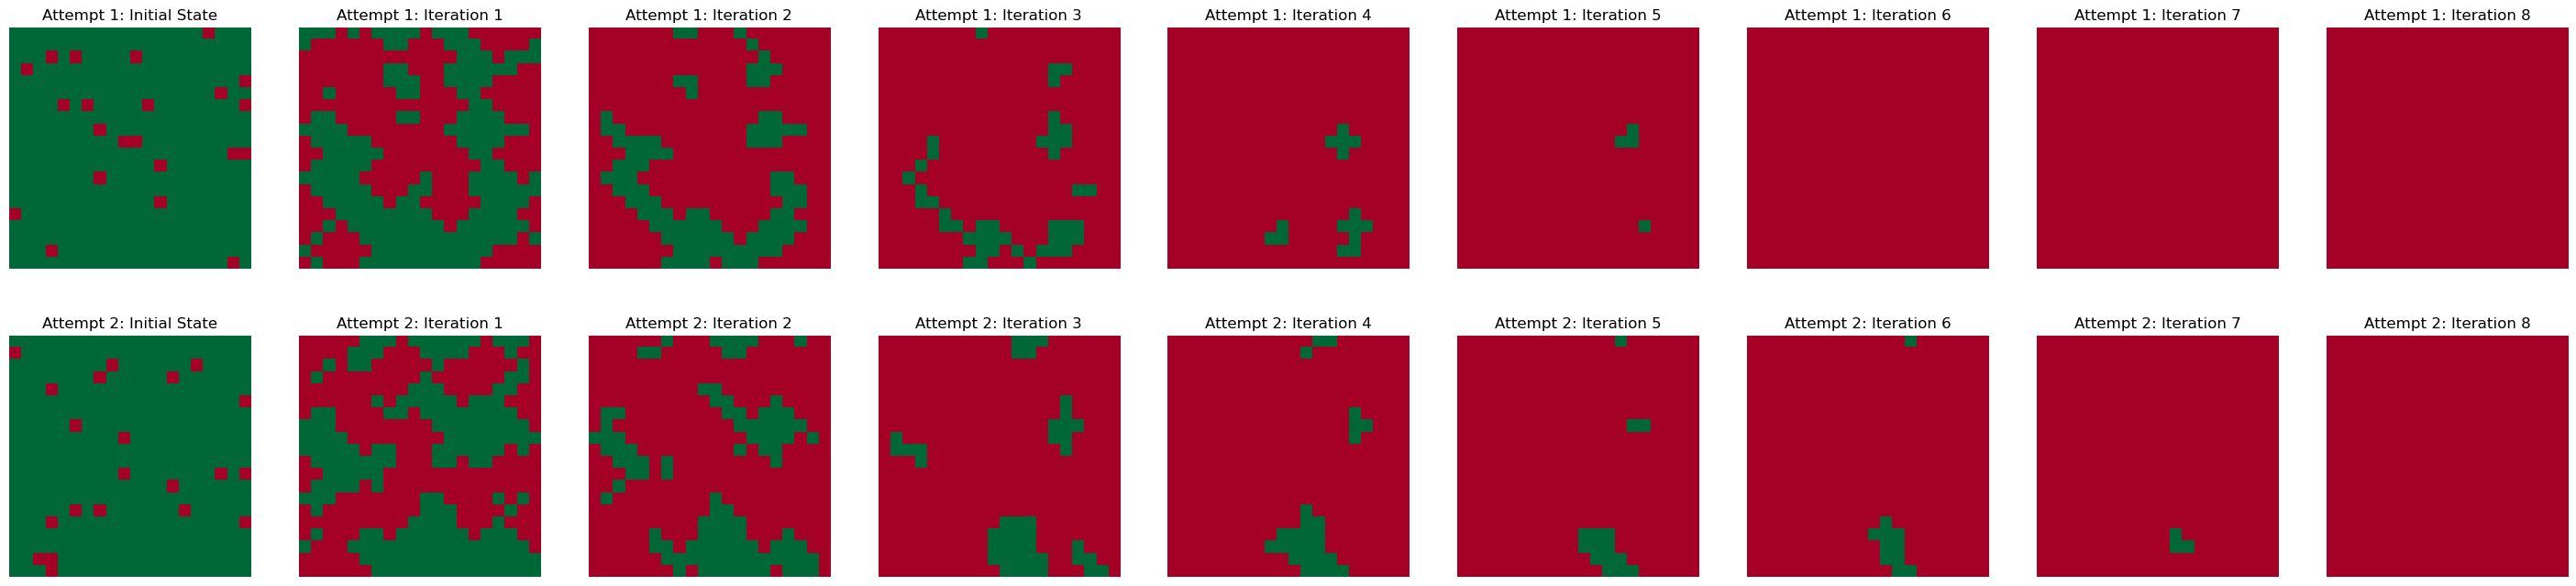

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import random

# TORUS
#Skewing initial distribution

# Define payoff values
T = 5
R = 3
P = 1
S = 0

# Total number of iterations
total_iterations = 8  # Change as needed
# Plot every nth iteration
plot_interval = 1

# Number of attempts
num_attempts = 2

# Convert 'C' and 'D' to colors
def strategy_to_color(strategy_matrix):
    return np.where(strategy_matrix == 'C', 1, 0)

# Calculate number of plotted iterations
plotted_iterations = total_iterations // plot_interval

# Calculate number of rows and columns for subplots
rows = num_attempts
cols = plotted_iterations + 1  # +1 for initial state

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

# Run simulation for each attempt
for attempt in range(num_attempts):
    # Initialize 20x20 strategy matrix
    strategies = ['C', 'D']
    A = np.random.choice(strategies, size=(20, 20), p=[0.95, 0.05])

    # Plot initial state
    axes[attempt, 0].imshow(strategy_to_color(A), cmap='RdYlGn', interpolation='nearest')
    axes[attempt, 0].set_title(f"Attempt {attempt + 1}: Initial State")
    axes[attempt, 0].axis('off')

    # Run simulation
    for iteration in range(total_iterations + 1):
        # Initialize score matrix
        B = np.zeros((20, 20))

        # Compute score matrix
        for i in range(20):
            for j in range(20):
                up = (i - 1) % 20
                down = (i + 1) % 20
                left = (j - 1) % 20
                right = (j + 1) % 20

                if A[i, j] == 'C':
                    B[i, j] += R if A[up, j] == 'C' else S
                    B[i, j] += R if A[down, j] == 'C' else S
                    B[i, j] += R if A[i, left] == 'C' else S
                    B[i, j] += R if A[i, right] == 'C' else S
                else:
                    B[i, j] += T if A[up, j] == 'C' else P
                    B[i, j] += T if A[down, j] == 'C' else P
                    B[i, j] += T if A[i, left] == 'C' else P
                    B[i, j] += T if A[i, right] == 'C' else P

        # Create new strategy matrix
        A_new = A.copy()

        # Update strategies
        for i in range(20):
            for j in range(20):
                up = (i - 1) % 20
                down = (i + 1) % 20
                left = (j - 1) % 20
                right = (j + 1) % 20

                # Collect neighbors' scores
                neighbors_scores = [B[up, j], B[down, j], B[i, left], B[i, right]]
                max_score = max(neighbors_scores)

                # Find all neighbors who have maximum score
                max_score_neighbors = []
                if B[up, j] == max_score:
                    max_score_neighbors.append(A[up, j])
                if B[down, j] == max_score:
                    max_score_neighbors.append(A[down, j])
                if B[i, left] == max_score:
                    max_score_neighbors.append(A[i, left])
                if B[i, right] == max_score:
                    max_score_neighbors.append(A[i, right])

                # If current player's score is less than max score, update strategy
                if B[i, j] < max_score:
                    A_new[i, j] = random.choice(max_score_neighbors)
                # Otherwise, keep current strategy
                else:
                    A_new[i, j] = A[i, j]

        # Update A for next iteration
        A = A_new

        # Plot strategy matrix for every nth iteration
        if iteration % plot_interval == 0 and iteration != 0:
            plot_index = iteration // plot_interval
            axes[attempt, plot_index].imshow(strategy_to_color(A), cmap='RdYlGn', interpolation='nearest')
            axes[attempt, plot_index].set_title(f"Attempt {attempt + 1}: Iteration {iteration}")
            axes[attempt, plot_index].axis('off')

plt.show()

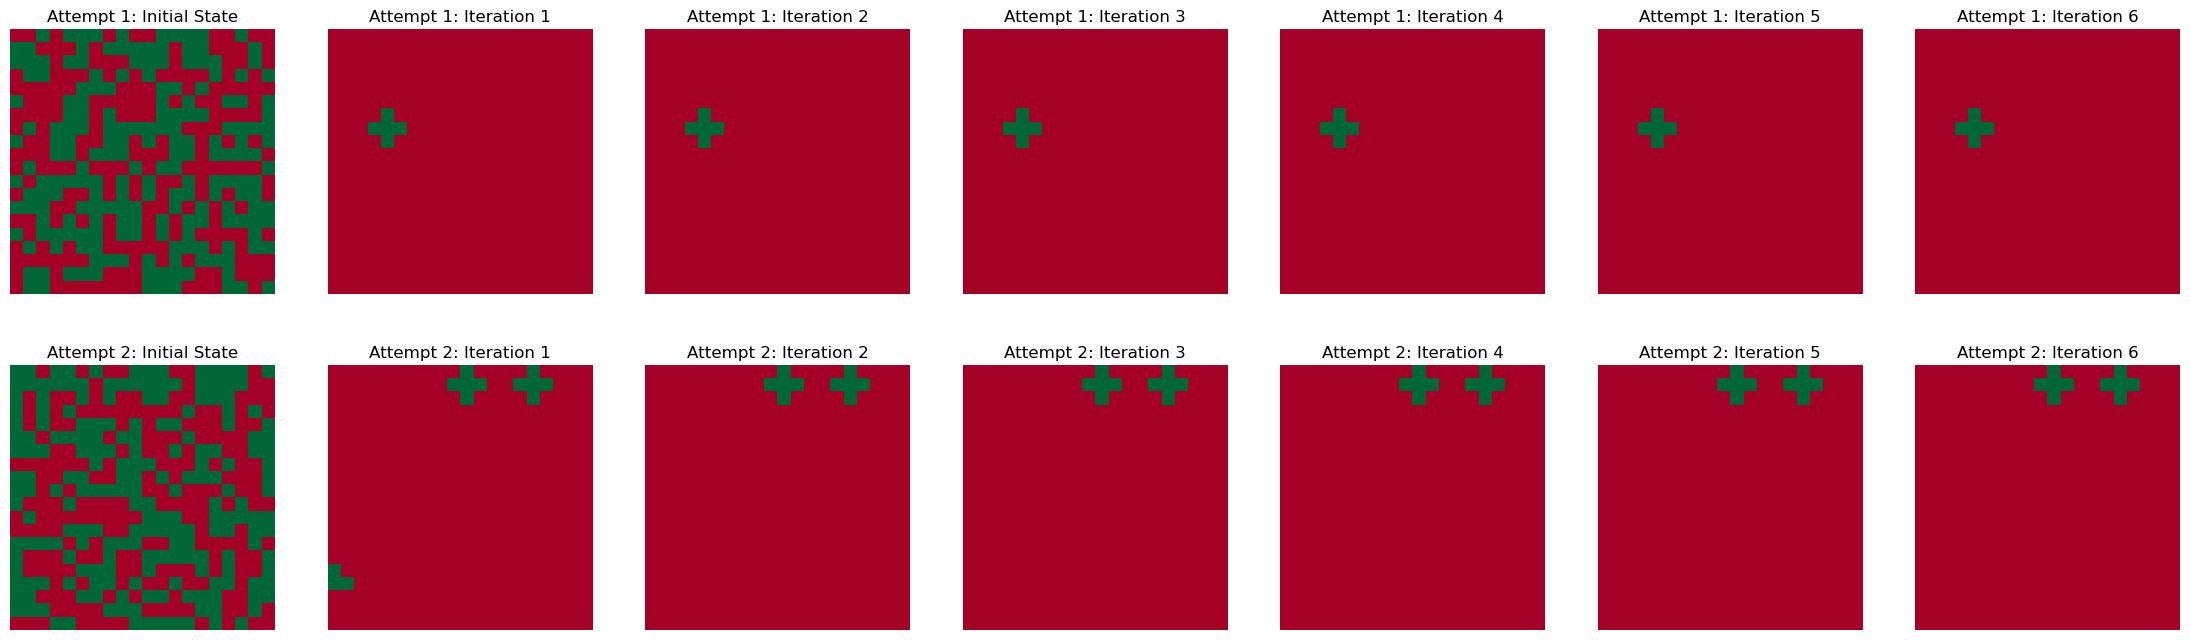

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random

# TORUS
#changing the payoffs

# Define payoff values
T = 5
R = 3
P = 0.5
S = 0

# Total number of iterations
total_iterations = 6  # Change as needed
# Plot every nth iteration
plot_interval = 1

# Number of attempts
num_attempts = 2

# Convert 'C' and 'D' to colors
def strategy_to_color(strategy_matrix):
    return np.where(strategy_matrix == 'C', 1, 0)

# Calculate number of plotted iterations
plotted_iterations = total_iterations // plot_interval

# Calculate number of rows and columns for subplots
rows = num_attempts
cols = plotted_iterations + 1  # +1 for initial state

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

# Run simulation for each attempt
for attempt in range(num_attempts):
    # Initialize 20x20 strategy matrix
    strategies = ['C', 'D']
    A = np.random.choice(strategies, size=(20, 20), p=[0.5, 0.5])

    # Plot initial state
    axes[attempt, 0].imshow(strategy_to_color(A), cmap='RdYlGn', interpolation='nearest')
    axes[attempt, 0].set_title(f"Attempt {attempt + 1}: Initial State")
    axes[attempt, 0].axis('off')

    # Run simulation
    for iteration in range(total_iterations + 1):
        # Initialize score matrix
        B = np.zeros((20, 20))

        # Compute score matrix
        for i in range(20):
            for j in range(20):
                up = (i - 1) % 20
                down = (i + 1) % 20
                left = (j - 1) % 20
                right = (j + 1) % 20

                if A[i, j] == 'C':
                    B[i, j] += R if A[up, j] == 'C' else S
                    B[i, j] += R if A[down, j] == 'C' else S
                    B[i, j] += R if A[i, left] == 'C' else S
                    B[i, j] += R if A[i, right] == 'C' else S
                else:
                    B[i, j] += T if A[up, j] == 'C' else P
                    B[i, j] += T if A[down, j] == 'C' else P
                    B[i, j] += T if A[i, left] == 'C' else P
                    B[i, j] += T if A[i, right] == 'C' else P

        # Create new strategy matrix
        A_new = A.copy()

        # Update strategies
        for i in range(20):
            for j in range(20):
                up = (i - 1) % 20
                down = (i + 1) % 20
                left = (j - 1) % 20
                right = (j + 1) % 20

                # Collect neighbors' scores
                neighbors_scores = [B[up, j], B[down, j], B[i, left], B[i, right]]
                max_score = max(neighbors_scores)

                # Find all neighbors who have maximum score
                max_score_neighbors = []
                if B[up, j] == max_score:
                    max_score_neighbors.append(A[up, j])
                if B[down, j] == max_score:
                    max_score_neighbors.append(A[down, j])
                if B[i, left] == max_score:
                    max_score_neighbors.append(A[i, left])
                if B[i, right] == max_score:
                    max_score_neighbors.append(A[i, right])

                # If current player's score is less than max score, update strategy
                if B[i, j] < max_score:
                    A_new[i, j] = random.choice(max_score_neighbors)
                # Otherwise, keep current strategy
                else:
                    A_new[i, j] = A[i, j]

        # Update A for next iteration
        A = A_new

        # Plot strategy matrix for every nth iteration
        if iteration % plot_interval == 0 and iteration != 0:
            plot_index = iteration // plot_interval
            axes[attempt, plot_index].imshow(strategy_to_color(A), cmap='RdYlGn', interpolation='nearest')
            axes[attempt, plot_index].set_title(f"Attempt {attempt + 1}: Iteration {iteration}")
            axes[attempt, plot_index].axis('off')

plt.show()


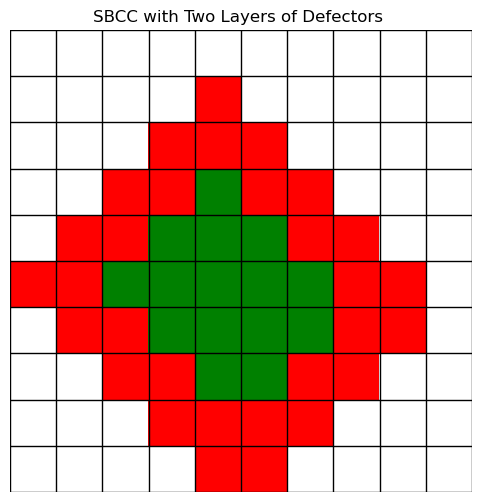

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Convert 'C', 'D', and 'X' to colors (1 for C, 0 for D, 2 for X)
def strategy_to_color(strategy_matrix):
    color_map = {'C': 1, 'D': 0, 'X': 2}
    return np.vectorize(color_map.get)(strategy_matrix)

# Initialize 20x20 strategy matrix with 'C', 'D', and 'X'
strategies = ['C', 'D', 'X']
A = np.random.choice(strategies, size=(10, 10), p=[0, 0, 1])  # Adjust probabilities as needed
A[3, 4] = 'C'
A[4, 3:6] = 'C'
A[5, 2:7] = 'C'
A[6, 3:7] = 'C'
A[7, 4:6] = 'C'

A[1, 4] = 'D'
A[2, 3:6] = 'D'
A[3, [2, 3, 5, 6]] = 'D'
A[4, [1, 2, 6, 7]] = 'D'
A[5, [0, 1, 7, 8]] = 'D'
A[6, [1, 2, 7, 8]] = 'D'
A[7, [2, 3, 6, 7]] = 'D'
A[8, 3:7] = 'D'
A[9, 4:6] = 'D'

# Create custom colormap to represent three strategies: Red for 'D', Green for 'C', White for 'X'
cmap = ListedColormap(['red', 'green', 'white'])

# Create a single plot
plt.figure(figsize=(6, 6))  # Set figure size
plt.imshow(strategy_to_color(A), cmap=cmap, interpolation='nearest')

# Add grid lines
plt.grid(which='both', color='black', linestyle='-', linewidth=1)  
plt.gca().set_xticks(np.arange(-0.5, A.shape[1], 1), minor=True)  
plt.gca().set_yticks(np.arange(-0.5, A.shape[0], 1), minor=True)  
plt.gca().tick_params(which='minor', size=0)  

# Add title and remove axes
plt.title("SBCC with Two Layers of Defectors ")
plt.axis('off')  # Hide axes

# Add horizontal and vertical lines to create a grid
for i in range(A.shape[0] + 1):
    plt.axhline(i - 0.5, color='black', linewidth=1)
for j in range(A.shape[1] + 1):
    plt.axvline(j - 0.5, color='black', linewidth=1)

plt.savefig("SBCC_Defectors.pdf")
plt.show()

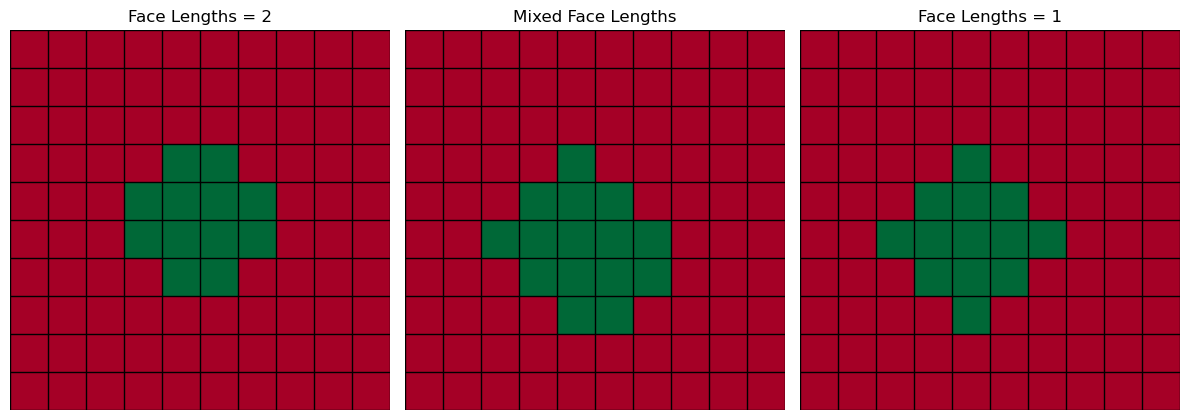

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# SBCC examples

# Convert 'C' and 'D' to colors
def strategy_to_color(strategy_matrix):
    return np.where(strategy_matrix == 'C', 1, 0)

# Initialize 20x20 strategy matrices with 'C' and 'D'
strategies = ['C', 'D']
A = np.random.choice(strategies, size=(10, 10), p=[0, 1])

A[3, 4:6] = 'C'
A[4, 3:7] = 'C'
A[5, 3:7] = 'C'
A[6, 4:6] = 'C'

B = np.random.choice(strategies, size=(10, 10), p=[0, 1])

B[3, 4] = 'C'
B[4, 3:6] = 'C'
B[5, 2:7] = 'C'
B[6, 3:7] = 'C'
B[7, 4:6] = 'C'

C = np.random.choice(strategies, size=(10, 10), p=[0, 1])

C[3, 4] = 'C'
C[4, 3:6] = 'C'
C[5, 2:7] = 'C'
C[6, 3:6] = 'C'
C[7, 4] = 'C'

# Create figure with 4 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 6))  # 1 row, 3 columns

# List of matrices and titles
matrices = [A, B, C]
titles = ["Face Lengths = 2", "Mixed Face Lengths", "Face Lengths = 1"]

# Loop through matrices and plot them
for i, ax in enumerate(axes):
    ax.imshow(strategy_to_color(matrices[i]), cmap='RdYlGn', interpolation='nearest')
    ax.set_title(titles[i])
    ax.axis('off')  # Hide axes for clarity

    # Add grid lines
    for row in range(matrices[i].shape[0] + 1):
        ax.axhline(row - 0.5, color='black', linewidth=1)
    for col in range(matrices[i].shape[1] + 1):
        ax.axvline(col - 0.5, color='black', linewidth=1)

plt.tight_layout()  # Adjust layout for better spacing
plt.savefig("SBCC_Examples.pdf")
plt.show()

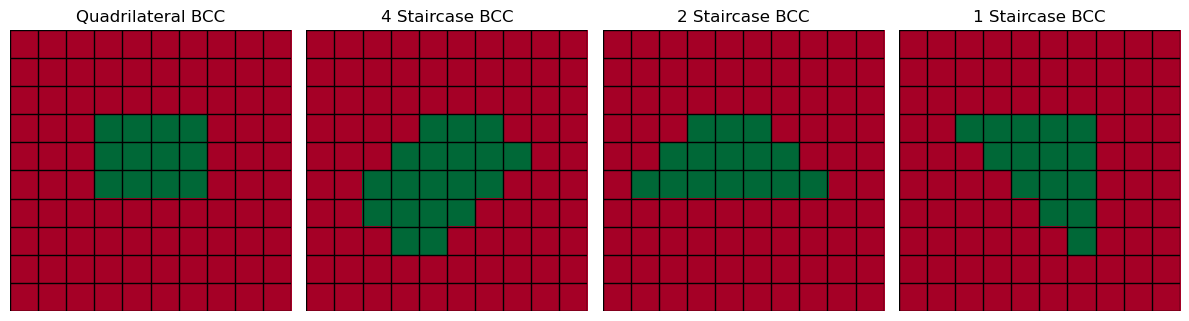

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# BCC examples

# Convert 'C' and 'D' to colors
def strategy_to_color(strategy_matrix):
    return np.where(strategy_matrix == 'C', 1, 0)

# Initialize 20x20 strategy matrices with 'C' and 'D'
strategies = ['C', 'D']
A = np.random.choice(strategies, size=(10, 10), p=[0, 1])

A[3, 3:7] = 'C'
A[4, 3:7] = 'C'
A[5, 3:7] = 'C'

B = np.random.choice(strategies, size=(10, 10), p=[0, 1])

B[3, 4:7] = 'C'
B[4, 3:8] = 'C'
B[5, 2:7] = 'C'
B[6, 2:6] = 'C'
B[7, 3:5] = 'C'

C = np.random.choice(strategies, size=(10, 10), p=[0, 1])

C[3, 3:6] = 'C'
C[4, 2:7] = 'C'
C[5, 1:8] = 'C'

D = np.random.choice(strategies, size=(10, 10), p=[0, 1])

D[3, 2:7] = 'C'
D[4, 3:7] = 'C'
D[5, 4:7] = 'C'
D[6, 5:7] = 'C'
D[7, 6] = 'C'

# Create figure with 4 subplots side by side
fig, axes = plt.subplots(1, 4, figsize=(12, 6))  # 1 row, 4 columns

# List of matrices and titles
matrices = [A, B, C, D]
titles = ["Quadrilateral BCC", "4 Staircase BCC", "2 Staircase BCC", "1 Staircase BCC"]

# Loop through matrices and plot them
for i, ax in enumerate(axes):
    ax.imshow(strategy_to_color(matrices[i]), cmap='RdYlGn', interpolation='nearest')
    ax.set_title(titles[i])
    ax.axis('off')  # Hide axes for clarity

    # Add grid lines
    for row in range(matrices[i].shape[0] + 1):
        ax.axhline(row - 0.5, color='black', linewidth=1)
    for col in range(matrices[i].shape[1] + 1):
        ax.axvline(col - 0.5, color='black', linewidth=1)

plt.tight_layout()  # Adjust layout for better spacing
plt.savefig("BCC_Examples.pdf")
plt.show()

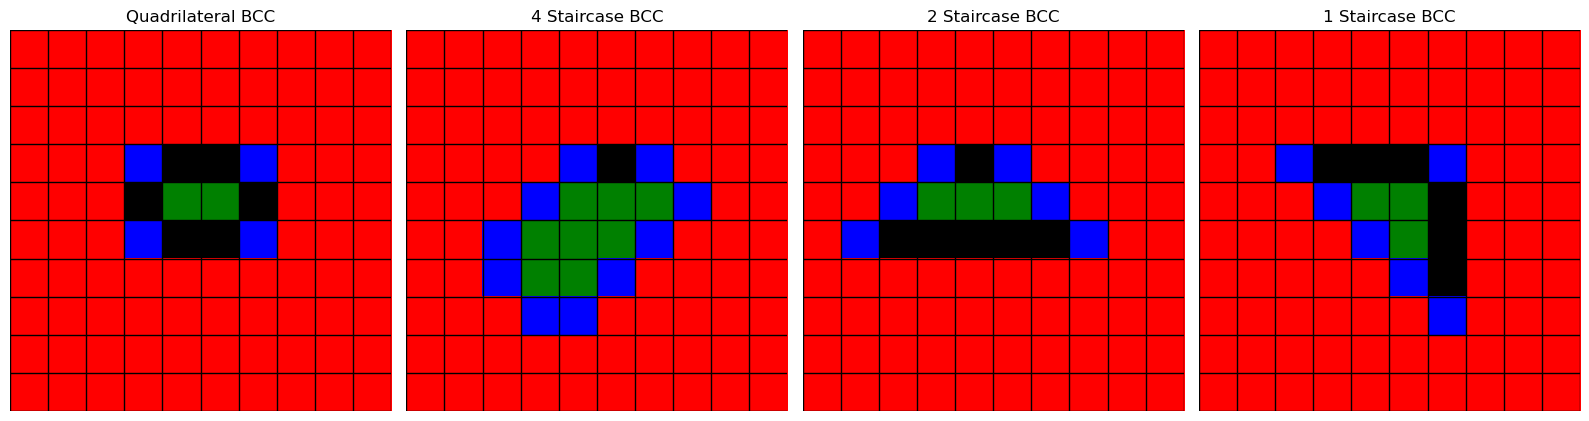

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Illustration of Face and Corner pieces

# Convert 'C', 'D', 'X', and 'Y' to colors
def strategy_to_color(strategy_matrix):
    color_map = {'C': 1, 'D': 0, 'X': 2, 'Y': 3}
    return np.vectorize(color_map.get)(strategy_matrix)

# Initialize 20x20 strategy matrices with 'C', 'D', 'X', and 'Y'
strategies = ['C', 'D', 'X', 'Y']
A = np.random.choice(strategies, size=(10, 10), p=[0, 1, 0, 0])  # Equal probabilities for all

A[3, 3:7] = 'C'
A[4, 3:7] = 'C'
A[5, 3:7] = 'C'

A[3, [3,6]] = 'Y'
A[5,[3,6]] = 'Y'

A[3, 4:6] = 'X'
A[4, [3,6]] = 'X'
A[5, 4:6] = 'X'

B = np.random.choice(strategies, size=(10, 10), p=[0, 1, 0, 0])

B[3, 4:7] = 'C'
B[4, 3:8] = 'C'
B[5, 2:7] = 'C'
B[6, 2:6] = 'C'
B[7, 3:5] = 'C'

B[3, [4,6]] = 'Y'
B[4, [3,7]] = 'Y'
B[5, [2,6]] = 'Y'
B[6, [2,5]] = 'Y'
B[7, [3,4]] = 'Y'

B[3, 5] = 'X'


C = np.random.choice(strategies, size=(10, 10), p=[0, 1, 0, 0])

C[3, 3:6] = 'C'
C[4, 2:7] = 'C'
C[5, 1:8] = 'C'

C[3, [3,5]]= 'Y'
C[4, [2,6]]= 'Y'
C[5, [1,7]] = 'Y'

C[3, 4] = 'X'
C[5, 2:7] = 'X'

D = np.random.choice(strategies, size=(10, 10), p=[0, 1, 0, 0])

D[3, 2:7] = 'C'
D[4, 3:7] = 'C'
D[5, 4:7] = 'C'
D[6, 5:7] = 'C'
D[7, 6] = 'C'

D[3, [2,6]] = 'Y'
D[4, 3] = 'Y'
D[5, 4] = 'Y'
D[6, 5] = 'Y'
D[7, 6] = 'Y'

D[3, 3:6] = 'X'
D[4:7, 6] = 'X'

# Create figure with 4 subplots side by side
fig, axes = plt.subplots(1, 4, figsize=(16, 6))  # Adjusted figure size

# List of matrices and titles
matrices = [A, B, C, D]
titles = ["Quadrilateral BCC", "4 Staircase BCC", "2 Staircase BCC", "1 Staircase BCC"]

# Create custom colormap
cmap = ListedColormap(['red', 'green', 'black', 'blue'])  # D, C, X, Y

# Loop through matrices and plot them
for i, ax in enumerate(axes):
    ax.imshow(strategy_to_color(matrices[i]), cmap=cmap, interpolation='nearest')
    ax.set_title(titles[i])
    ax.axis('off')  # Hide axes for clarity

    # Add grid lines
    for row in range(matrices[i].shape[0] + 1):
        ax.axhline(row - 0.5, color='black', linewidth=1)
    for col in range(matrices[i].shape[1] + 1):
        ax.axvline(col - 0.5, color='black', linewidth=1)

plt.tight_layout()  # Adjust layout for better spacing
plt.savefig("Face_Corner_Pieces.pdf")
plt.show()

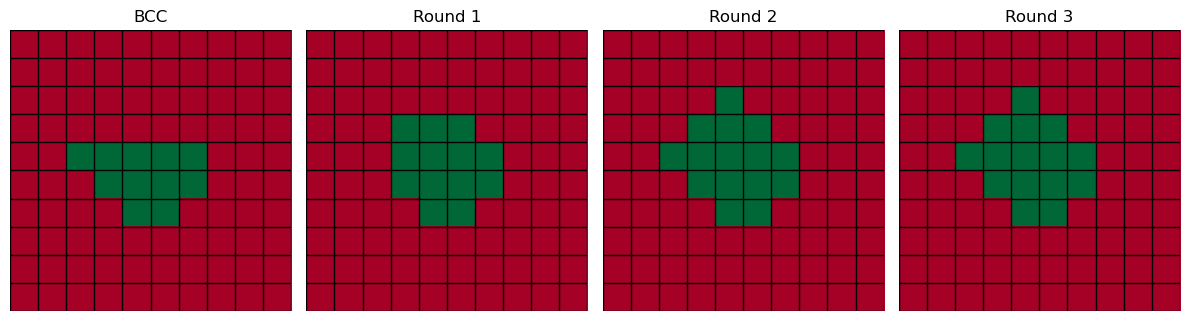

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# BCC to SBCC

# Convert 'C' and 'D' to colors
def strategy_to_color(strategy_matrix):
    return np.where(strategy_matrix == 'C', 1, 0)

# Initialize 20x20 strategy matrices with 'C' and 'D'
strategies = ['C', 'D']
A = np.random.choice(strategies, size=(10, 10), p=[0, 1])

A[4, 2:7] = 'C'
A[5, 3:7] = 'C'
A[6, 4:6] = 'C'

B = np.random.choice(strategies, size=(10, 10), p=[0, 1])

B[3, 3:6] = 'C'
B[4, 3:7] = 'C'
B[5, 3:7] = 'C'
B[6, 4:6] = 'C'

C = np.random.choice(strategies, size=(10, 10), p=[0, 1])

C[2,4] = 'C'
C[3, 3:6] = 'C'
C[4, 2:7] = 'C'
C[5, 3:7] = 'C'
C[6, 4:6] = 'C'

D = np.random.choice(strategies, size=(10, 10), p=[0, 1])

D[2,4] = 'C'
D[3, 3:6] = 'C'
D[4, 2:7] = 'C'
D[5, 3:7] = 'C'
D[6, 4:6] = 'C'

# Create figure with 4 subplots side by side
fig, axes = plt.subplots(1, 4, figsize=(12, 6))  # 1 row, 4 columns

# List of matrices and titles
matrices = [A, B, C, D]
titles = ["BCC", "Round 1", "Round 2", "Round 3"]

# Loop through matrices and plot them
for i, ax in enumerate(axes):
    ax.imshow(strategy_to_color(matrices[i]), cmap='RdYlGn', interpolation='nearest')
    ax.set_title(titles[i])
    ax.axis('off')  # Hide axes for clarity

    # Add grid lines
    for row in range(matrices[i].shape[0] + 1):
        ax.axhline(row - 0.5, color='black', linewidth=1)
    for col in range(matrices[i].shape[1] + 1):
        ax.axvline(col - 0.5, color='black', linewidth=1)

plt.tight_layout()  # Adjust layout for better spacing
plt.savefig("BCC_Develop.pdf")
plt.show()